In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
import os
from PIL import Image
from IPython.display import display  # Import the display function

In [ ]:

# Correct path according to your environment
path_malignant = fr'C:\Users\joelb\OneDrive\Dokument\GitHub\ML-DL-Final-Assignment\test\Malignant'
path_benign = fr'C:\Users\joelb\OneDrive\Dokument\GitHub\ML-DL-Final-Assignment\test\Benign'
path_train_malignant = fr'C:\Users\joelb\OneDrive\Dokument\GitHub\ML-DL-Final-Assignment\train\Malignant'
path_train_benign = fr'C:\Users\joelb\OneDrive\Dokument\GitHub\ML-DL-Final-Assignment\train\Benign'

images = []
labels = []

# Function to load images from a directory
def load_images_from_folder(folder, label):
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Check if file is an image
            image_path = os.path.join(folder, filename)
            with Image.open(image_path) as image:  # Use 'with' to ensure files are closed after being opened
                images.append(image.copy())  # Use image.copy() to keep the image in memory after closing file
                labels.append(label)

# Load images and labels
load_images_from_folder(path_malignant, 'Malignant')
load_images_from_folder(path_benign, 'Benign')
load_images_from_folder(path_train_malignant, 'Malignant')
load_images_from_folder(path_train_benign, 'Benign')

# Create DataFrame
df = pd.DataFrame({
    'Image': images,
    'Label': labels
})




In [ ]:
# Display the first few rows of the DataFrame
print(df)

In [ ]:
# Assuming 'images' and 'labels' lists are already filled with PIL Image objects and labels respectively
pixel_data = [np.array(image).flatten() for image in images]
pixel_df = pd.DataFrame({
    'Pixels': pixel_data,
    'Label': labels
})


In [107]:


# Display the first few rows of the DataFrame
print(pixel_df)

                                                  Pixels      Label
0      [143, 109, 100, 144, 110, 101, 145, 111, 102, ...  Malignant
1      [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...  Malignant
2      [217, 210, 204, 217, 210, 204, 217, 210, 204, ...  Malignant
3      [4, 5, 0, 6, 7, 2, 9, 8, 4, 11, 10, 6, 16, 11,...  Malignant
4      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  Malignant
...                                                  ...        ...
13874  [126, 92, 91, 123, 89, 88, 126, 90, 90, 133, 9...     Benign
13875  [226, 130, 141, 226, 130, 141, 225, 129, 140, ...     Benign
13876  [242, 146, 158, 242, 146, 158, 241, 145, 157, ...     Benign
13877  [204, 158, 168, 203, 157, 167, 200, 154, 164, ...     Benign
13878  [240, 150, 175, 241, 151, 176, 245, 155, 180, ...     Benign

[13879 rows x 2 columns]
[array([143, 109, 100, ..., 139,  87,  89], dtype=uint8), array([2, 2, 2, ..., 0, 0, 0], dtype=uint8), array([217, 210, 204, ..., 146,  84,  87], dtype=uint8)

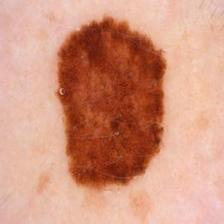

In [113]:
import numpy as np
from PIL import Image
from IPython.display import display  # Import the display function for Jupyter

# Assuming pixel_data contains the flattened pixel arrays and has been normalized to 0-1
# Convert the first image's pixel data back to an image

first_image_pixels = pixel_data[10] # Scale pixels back to 0-255 if they were normalized
first_image_pixels = first_image_pixels.astype(np.uint8)  # Ensure the type is uint8

# Reshape the pixel array to the dimensions of the original image
image_array = first_image_pixels.reshape(224, 224, 3)

# Create an image from the numpy array
image = Image.fromarray(image_array, 'RGB')

# Display the image in the notebook
display(image)


**PRE_PROCESSING**


In [ ]:
# Segmentation
# Augmentation 
# Maybe ESRGAN
